C:\Users\wjdqh\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\wjdqh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3322 - loss: 3.6632 
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8183 - loss: 0.5495 
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9036 - loss: 0.3100 
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9383 - loss: 0.1970 
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9559 - loss: 0.1406 
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9713 - loss: 0.1100 
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9848 - loss: 0.0790 
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9874 - loss: 0.0581 
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9882 - loss: 0.0494 
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9979 - loss: 0.0292   
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.0251 
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy

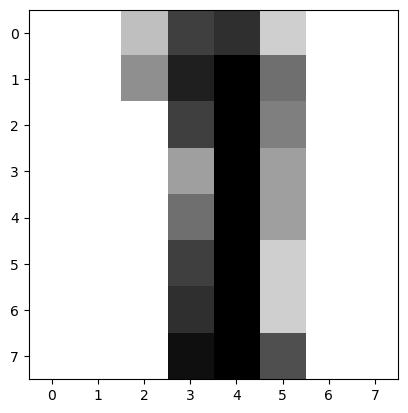

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  

# 레이블 원-핫 인코딩
labels = to_categorical(digits.target, num_classes=10)

# 학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# DNN 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도:", accuracy)

# 테스트 샘플 하나 시각화 및 예측
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = model.predict(X_test[10].reshape(1, -1))
print("예측 결과:", y_pred.argmax())
